# Import libraries

The `brisk` library is a custom-made Python library for the import, analysis and visualization of data from the BRISK project.
It comprises scripts and modules for managing data. All the main functions will be compiled in a script in order to be able to use all the functions outside the Python environment

A guide for the installation and the setup of the database, together with the list of scripts will be provided when the whole analysis is set up.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings

import brisk.visualization.plots_imu as imu
from brisk.utils import path
from brisk.analysis import segmentation

warnings.filterwarnings('ignore')

# List all the subjects

In the `brisk` library, a series of functions for the description of the database (number of subjects, number of trials) is provided.

In [2]:
subjects = path.get_subjects()
print(subjects)

subject = 'luca'
trials = path.get_trials(subject)
print(trials)

['giovanni', 'luca', 'micheal', 'simone']
['full', 'full_robot', 'half_robot', 'half_robot_touch']


# Visualize IMU data for one subject

Functions are provided also for the visualization of raw data (after a 5Hz LP filter)

<span style="color: red; font-weight: bold">Note</span> AP, ML and VT directions are defined during the neutral pose (arms parallel to the ground)

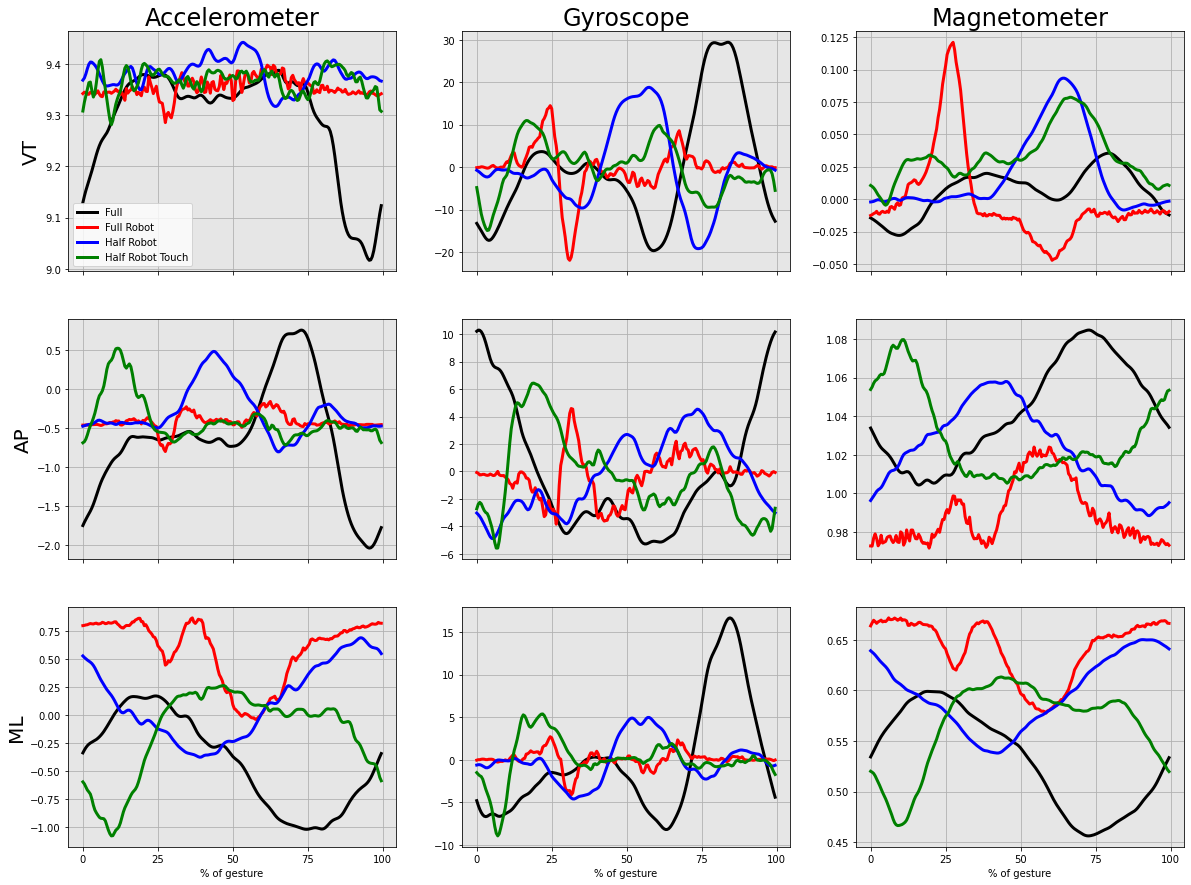

In [3]:
segment = 'trunk'
imu.plot_all_trials('giovanni', 'trunk')

# Get gesture frequency

All the quantitative analyses on the data will be hard-coded in the library, to ensure repeatability. Here, an example of the analysis of the speed of gestures, in terms of packages per minute

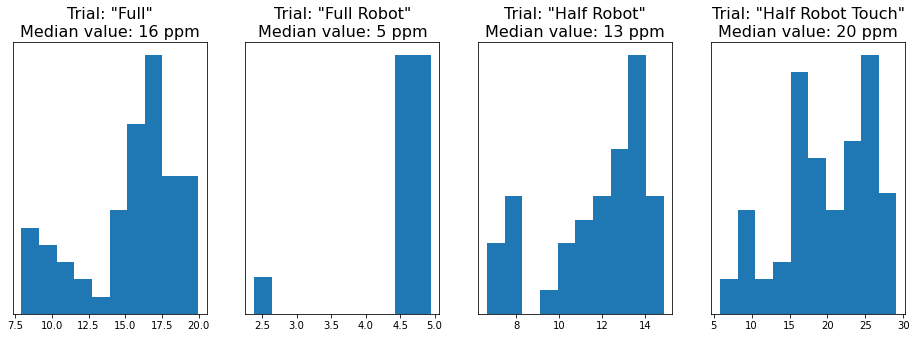

In [4]:
frequencies = segmentation.get_frequencies(subject)

fig, ax = plt.subplots(1,4,figsize=(16,5))
for i, k in enumerate(frequencies.keys()):
    ax[i].hist(frequencies[k])
    ax[i].set_title(
        f'Trial: \"{k.replace("_"," ").title()}\"\nMedian value: {np.median(frequencies[k]):.0f} ppm',
        fontsize=16
    )
    ax[i].set_yticks([])

# Time parameters

Frequencies and durations are selected as time-related global parameters

In [5]:
from brisk.analysis import parameters

tp = parameters.get_time_parameters(subject)
for k,v in tp.items():
    print(f'Trial {k.replace("_"," ").title()}, {v["all_frequency"].size} trials after outliers removal')
    print(f'\tAverage frequency: {v["avg_frequency"]:.0f} PPM')
    print(f'\tAverage duration: {v["avg_duration"]:.2f} s')
    print(f'\tVariability of duration: {v["std_duration"]:.2f} s')
    print()

Trial Full, 55 trials after outliers removal
	Average frequency: 16 PPM
	Average duration: 3.71 s
	Variability of duration: 0.67 s

Trial Full Robot, 13 trials after outliers removal
	Average frequency: 5 PPM
	Average duration: 12.98 s
	Variability of duration: 0.37 s

Trial Half Robot, 38 trials after outliers removal
	Average frequency: 13 PPM
	Average duration: 4.76 s
	Variability of duration: 1.12 s

Trial Half Robot Touch, 66 trials after outliers removal
	Average frequency: 20 PPM
	Average duration: 2.96 s
	Variability of duration: 1.16 s



# Extraction of the cycle based parameters

The cycle based parameters are:

- RMS value during the event (after removing mean value)
- Smoothness during the event (after removing mean value), described via the negative log-dimensionless jerk (i.e. more negative, less smooth)
- Value range during the event

All the parameters have been calculated on the 3 spatial component and on the global (total) value, of both accelerometer and gyroscope data

In [6]:
param = parameters.cycle_parameters(subject)

Loading saved cycle parameters...


# Extraction of the global parameters

In addition to the average value of the cycle parameters, regularity (i.e. value of the first peak of the autocorrelation) has been used as a parameter

In [7]:
pp = parameters.global_parameters(subject)

Loading saved global parameters...


# Plots

## Accelerometer

### Trunk

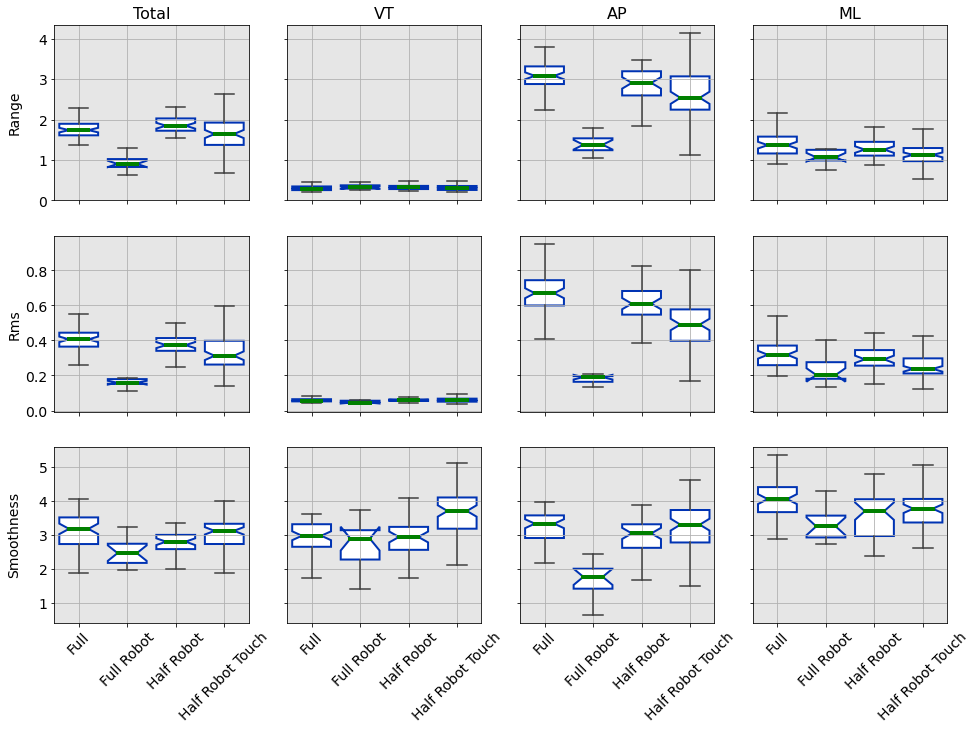

In [8]:
imu.plot_parameters(param, 'trunk', 'acc')

### Arm

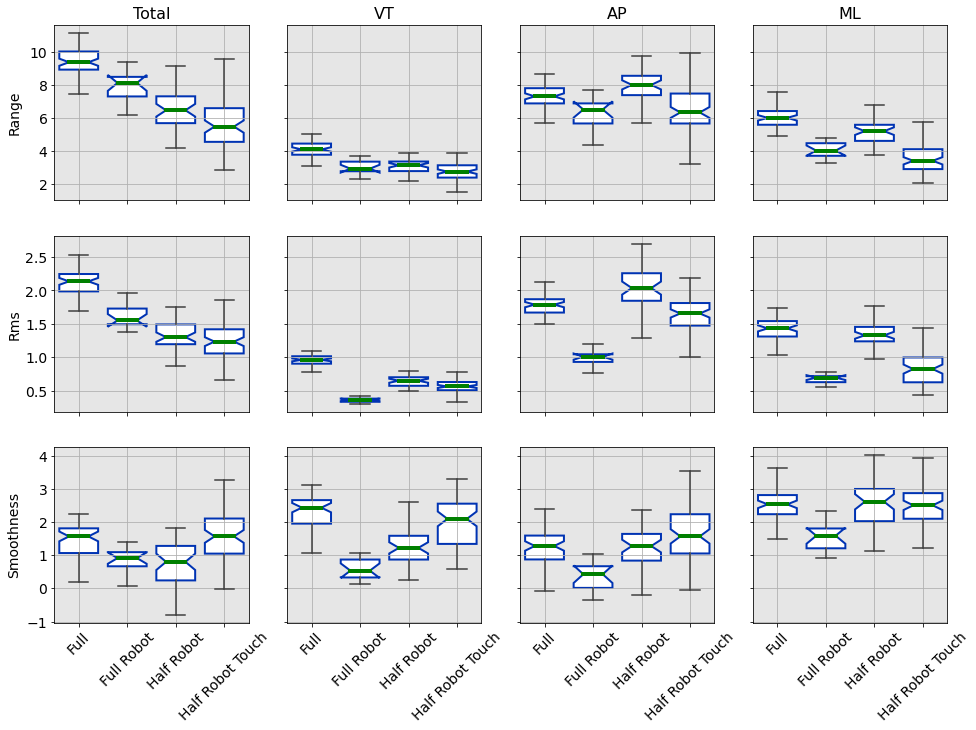

In [9]:
imu.plot_parameters(param, 'arm', 'acc')

### Forearm

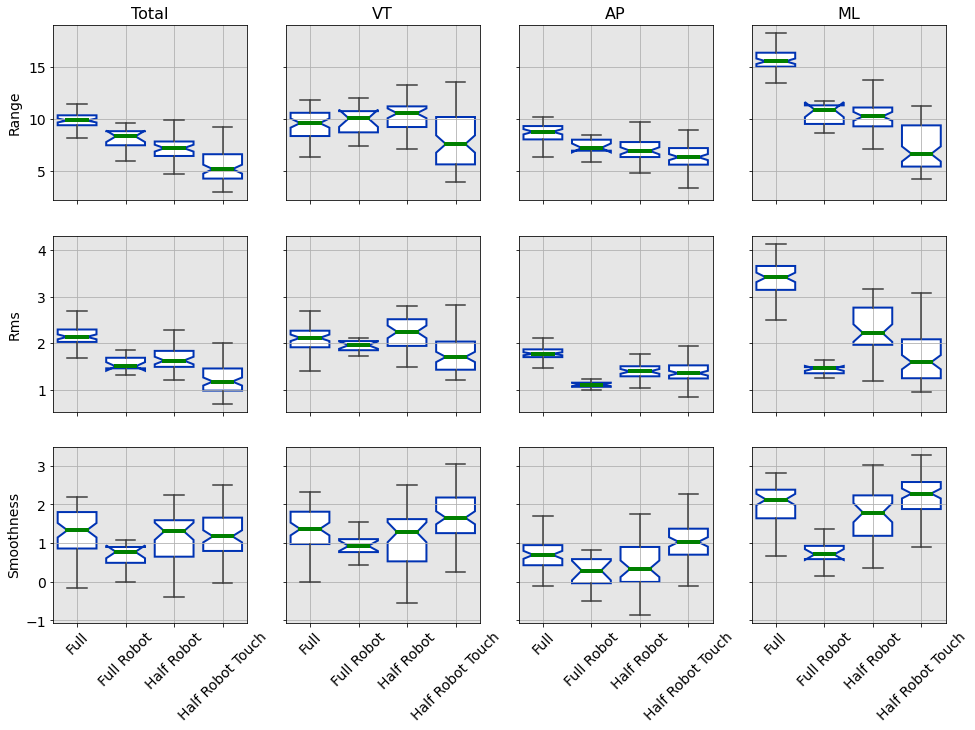

In [10]:
imu.plot_parameters(param, 'forearm', 'acc')

## Gyroscope

### Trunk

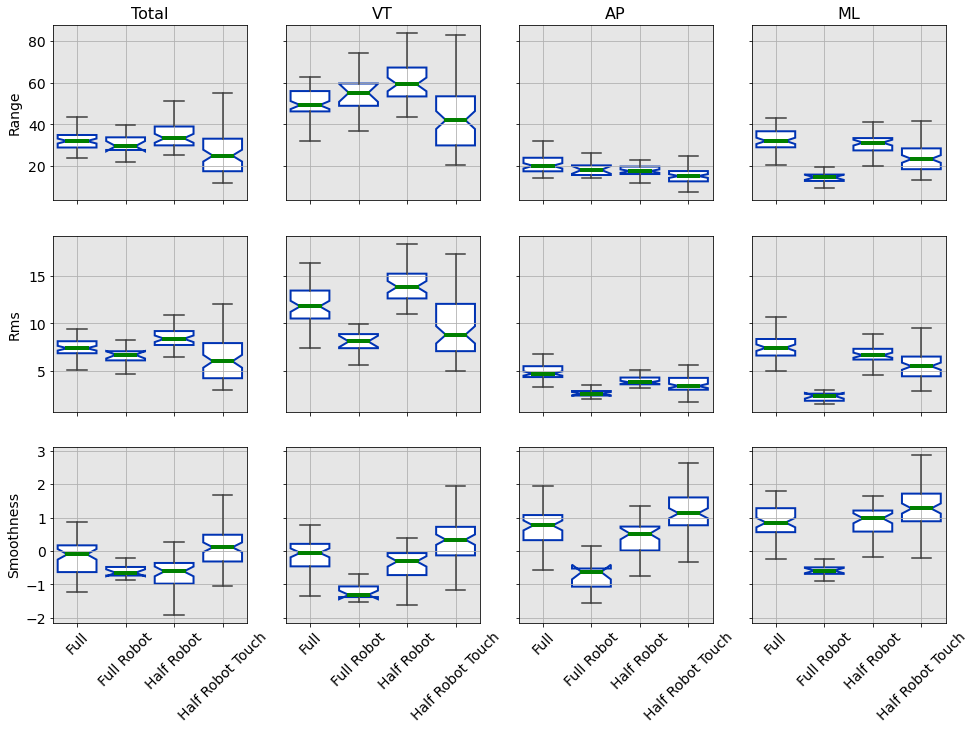

In [11]:
imu.plot_parameters(param, 'trunk', 'gyr')

### Arm

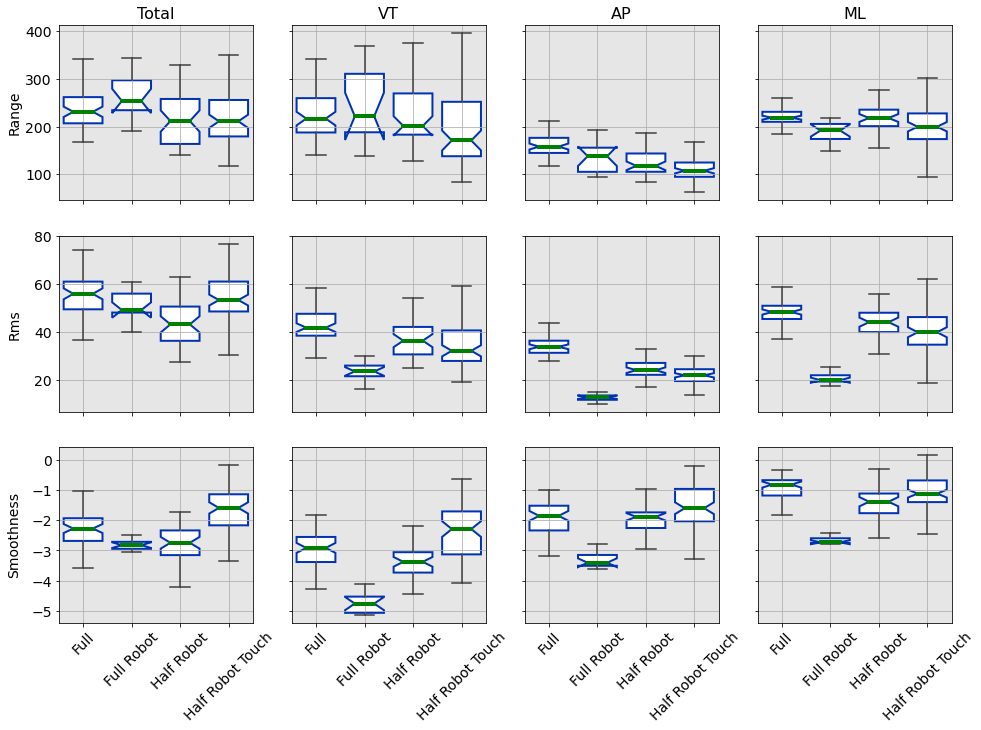

In [12]:
imu.plot_parameters(param, 'arm', 'gyr')

### Forearm

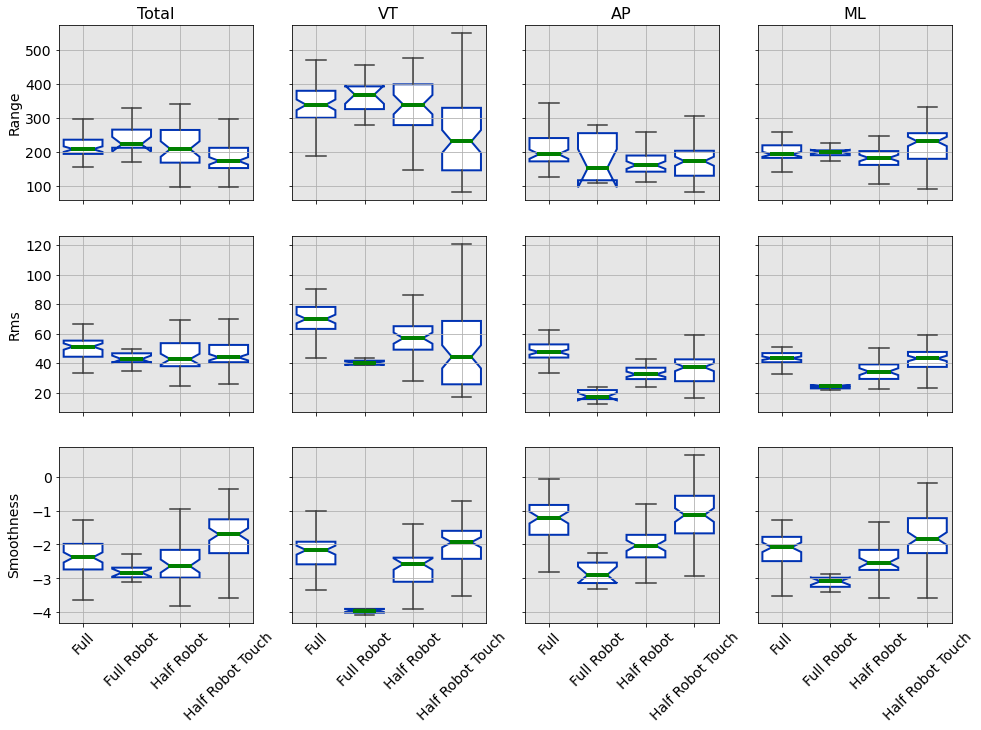

In [13]:
imu.plot_parameters(param, 'forearm', 'gyr')

# Global parameters

Here all the global parameters (number of events, median values for the cycle-based parameters and regularity) are shown.

In [14]:
pp.sort_values(axis=0,by=['segment','dimension']).set_index(['segment','dimension','trial']).head(pp.shape[0])

Unnamed: 0  smoothness_acc  range_acc  \
segment dimension trial                                                     
arm     global    half_robot_touch           0        1.550477   5.617720   
        x         half_robot_touch           1        1.977979   2.735334   
        y         half_robot_touch           2        1.643362   6.434932   
        z         half_robot_touch           3        2.487845   3.546506   
forearm global    half_robot_touch           4        1.221257   5.556735   
        x         half_robot_touch           5        1.670302   7.975478   
        y         half_robot_touch           6        1.019709   6.423635   
        z         half_robot_touch           7        2.212175   7.232191   
trunk   global    half_robot_touch           8        2.983790   1.623896   
        x         half_robot_touch           9        3.664238   0.313704   
        y         half_robot_touch          10        3.237794   2.583614   
        z         half_robot_touch          11        3.765302   1.146435   

                                     rms_acc  smoothness_gyr   range_gyr  \
segment dimension trial                                                    
arm     global    half_robot_touch  1.254115       -1.657390  222.151581   
        x         half_robot_touch  0.569519       -2.389510  201.034119   
        y         half_robot_touch  1.580098       -1.528868  115.622136   
        z         half_robot_touch  0.840040       -1.114974  192.101750   
forearm global    half_robot_touch  1.212996       -1.772335  191.614904   
        x         half_robot_touch  1.808575       -2.011762  250.248675   
        y         half_robot_touch  1.361960       -1.136938  176.366933   
        z         half_robot_touch  1.766764       -1.800993  218.375550   
trunk   global    half_robot_touch  0.327382        0.094512   26.389004   
        x         half_robot_touch  0.059409        0.272807   43.923291   
        y         half_robot_touch  0.500012        1.118650   15.561960   
        z         half_robot_touch  0.256543        1.250823   24.080615   

                                      rms_gyr  n_events   reg_acc   reg_gyr  
segment dimension trial                                                      
arm     global    half_robot_touch  55.848780        74  0.156025  0.197521  
        x         half_robot_touch  36.460348        74  0.224067  0.145230  
        y         half_robot_touch  22.759597        74  0.591572  0.000000  
        z         half_robot_touch  39.641851        74  0.740942  0.260495  
forearm global    half_robot_touch  47.162247        74  0.157802  0.179199  
        x         half_robot_touch  49.113596        74  0.114034  0.134879  
        y         half_robot_touch  37.104214        74  0.295798  0.221330  
        z         half_robot_touch  42.003870        74  0.383938  0.132449  
trunk   global    half_robot_touch   6.128239        74  0.000000  0.156603  
        x         half_robot_touch   9.834534        74  0.223991  0.177564  
        y         half_robot_touch   3.552912        74  0.249772  0.151883  
        z         half_robot_touch   5.510573        74  0.309838  0.123484